<a href="https://colab.research.google.com/github/AshokSaravanan222/Xtern-AI-Work-Prompt/blob/main/Ashok_Saravanan_XTern_AI_Work_Prompt_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# By: Ashok Saravanan
# Date: 10/15/23

# Imports/Setup

In [2]:
# for data/visuilization
import pandas as pd
import matplotlib.pyplot as plt

# for data pre-processing
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# for training/testing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# for evaluation
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, precision_recall_curve

# saving model
import pickle
from google.colab import files

### Training Dataset

In [3]:
 # reading in training dataset
df = pd.read_csv('train_students.csv')
df.head()

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


# Part 1: Exploratory Data Analysis

What I mean by 1A and 1B

1. I will first explore the training dataset, which has the Year, Major, University, and Time features, and see how they match up against the item ordered. Then I will describe any distributions/findings from here.

2. I will explore the data from the menu dataset, and see how differences in Calories, Price, and other generated features are represented in Orders. This could be useful to determine the customer base and find meaningful implications. I will describe distributions/findings for this dataset as well.


## Part 1A: Exploring Training Dataset

In [4]:
# printing all unique keys to get a feel for dataset
columns = list(df.columns.values) # ['Year', 'Major', 'University', 'Time', 'Order']
for column in columns:
  print(column, end=": ")
  print(df[column].unique())

Year: ['Year 2' 'Year 3' 'Year 1' 'Year 4']
Major: ['Physics' 'Chemistry' 'Biology' 'Business Administration' 'Anthropology'
 'Mathematics' 'Economics' 'Astronomy' 'Marketing' 'Political Science'
 'Finance' 'Sociology' 'Accounting' 'Psychology' 'International Business'
 'Music' 'Mechanical Engineering' 'Philosophy' 'Fine Arts'
 'Civil Engineering']
University: ['Indiana State University' 'Ball State University' 'Butler University'
 'Indiana University-Purdue University Indianapolis (IUPUI)'
 'University of Notre Dame' 'University of Evansville'
 'Valparaiso University' 'Purdue University'
 'Indiana University Bloomington' 'DePauw University']
Time: [12 14 11 15 13 17  9 10 16  8]
Order: ['Fried Catfish Basket' 'Sugar Cream Pie' 'Indiana Pork Chili'
 'Indiana Corn on the Cob (brushed with garlic butter)'
 'Indiana Buffalo Chicken Tacos (3 tacos)' 'Sweet Potato Fries'
 'Ultimate Grilled Cheese Sandwich (with bacon and tomato)'
 'Breaded Pork Tenderloin Sandwich' 'Cornbread Hush Puppies'


### Plotting Distributions

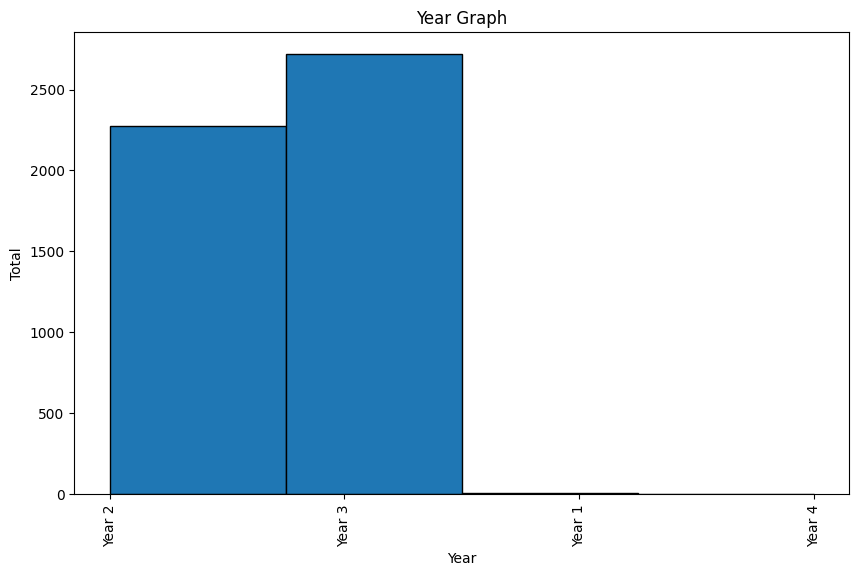

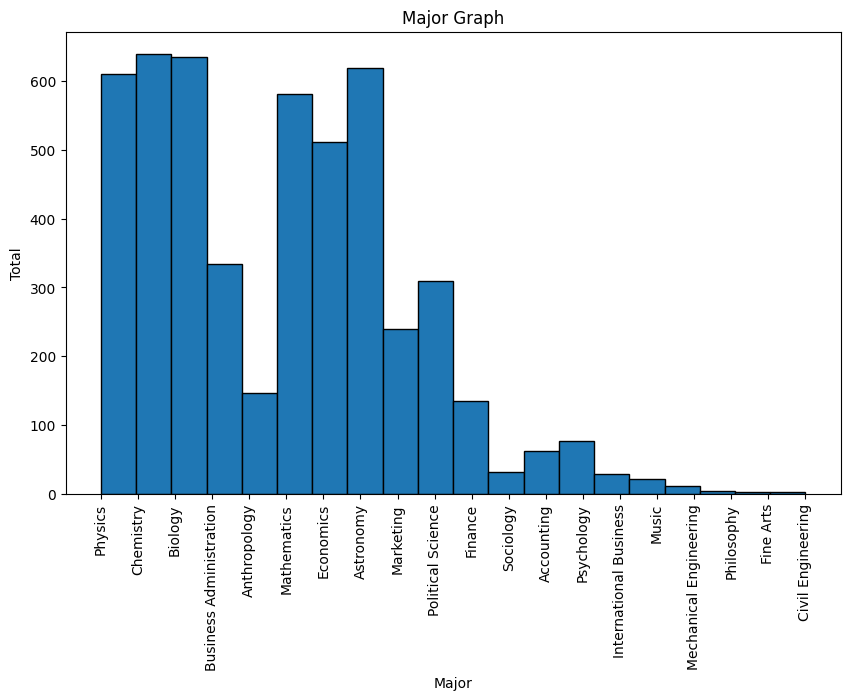

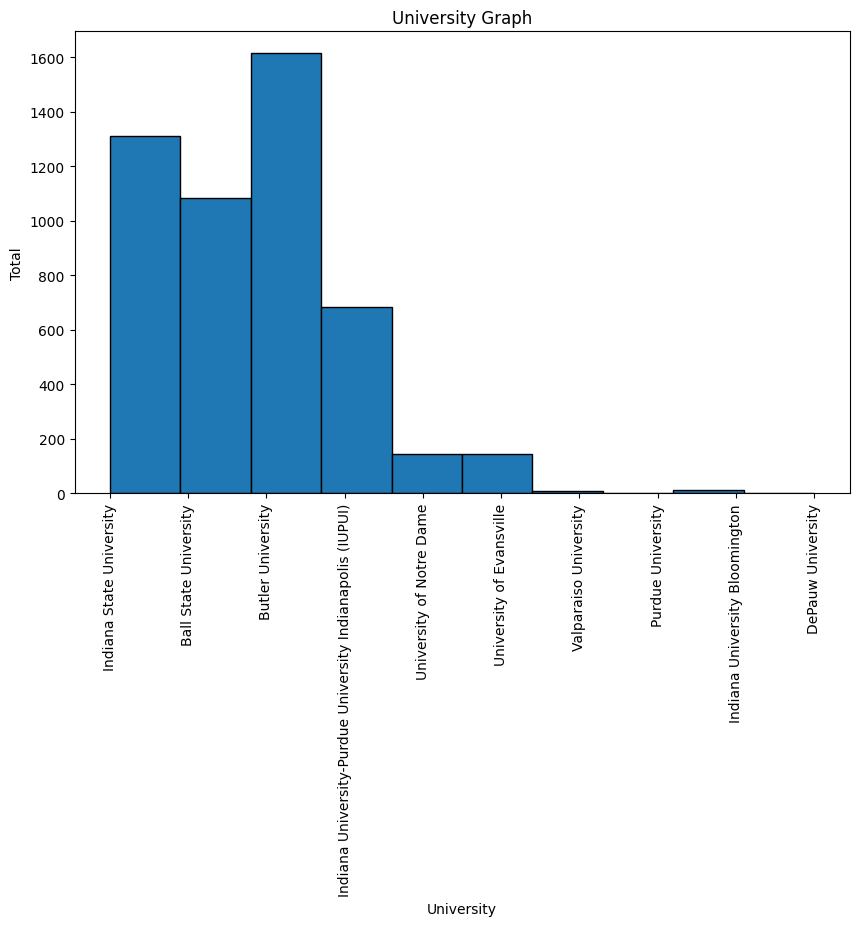

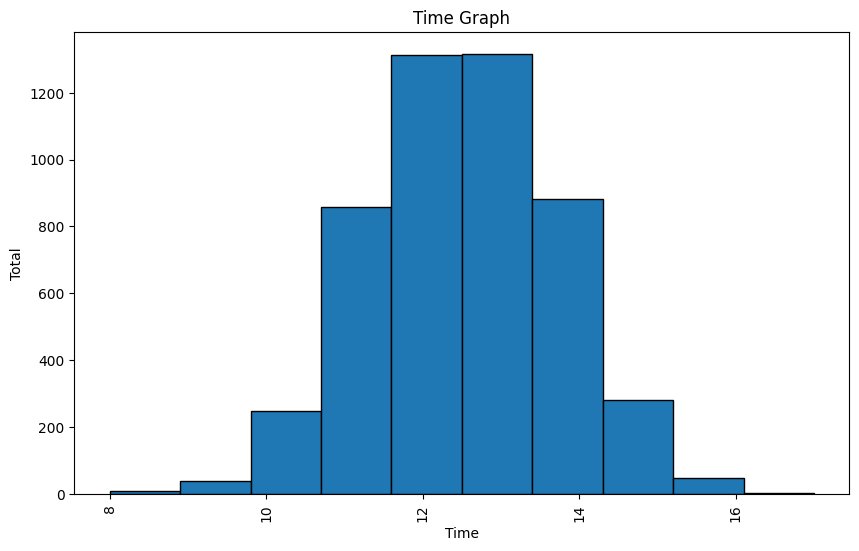

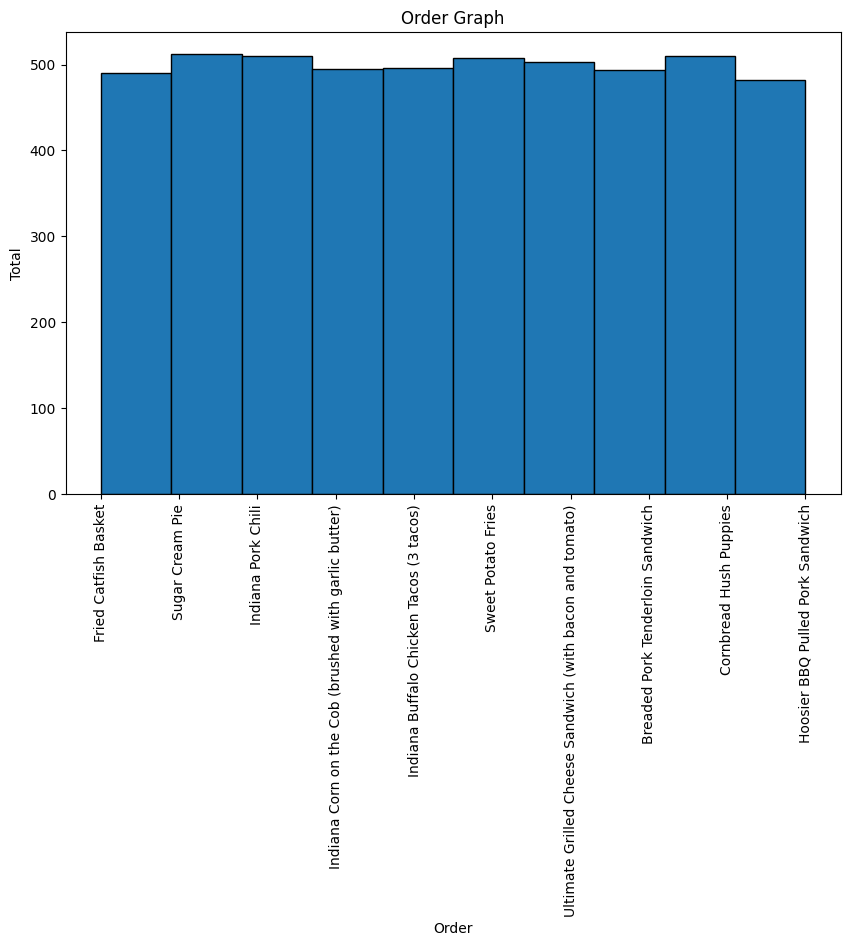

In [5]:
# printing out distributitons via histograms

def visualize(df): # saving in a function to use later
  for column in columns:
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the histogram with hist() function
    ax.hist(df[column[:10]], edgecolor = "black", bins = len(df[column].unique()))

    # Label axes and set title
    ax.set_title(column + " Graph")
    ax.set_xlabel(column)
    ax.set_ylabel("Total")

    plt.xticks(rotation=90) # so labels are visible!

    plt.show()
visualize(df)

## Distribution/Biases Interpretation

**Year**
* Distribution is heavily unbalanced and biased towards sophomores and juniors. Virtually no data on freshmen and seniors! A big issue for training the ML model.
* Maybe this might be due to the lifestyle of these students (freshmen may eat at dining courts/whereas seniors at apartments)?

**Major**
* Distribution is more balanced than Year but still is uneven. About 1/3 of majors have high orders, 1/3 with a medium-small amount, and 1/3 with little to none. This may prove to be difficult in the later steps of ML.
* Bias towards Physics, Chemistry, Biology, Math. Could this be because of their lifestyle or expected job salary?

**University**
* Uneven distribution, and only representative of about 1/2 of the universities.
* Biased towards Bulter(Most), Indiana State, Ball State, and IUPUI. After IUPUI, there are very low amounts of data (~10%) from other universities. This will be especially hard to account for in the machine learning model since accounting for bias here might introduce bias in other areas.
* Although not directly related, most of the top universities are relatively close to Indianapolis, so this could be something to explore in feature engineering.

**Time**
* There seems to be a bell curve normal distribution for the times of the orders. This makes sense as many people will probably be ordering around lunchtime.
* The data is 'biased' towards the afternoon (12-1 p.m.), but this does not present too big a problem. This seems to be the natural representation for ordering times, so it would not matter if the model learned more data for this representation anyway. This may be a little different in the case of universities because students from underrepresented ones may get discriminated against.
* Given that orders are biased towards the afternoon, could a new feature be engineered to help the model learn this distinction (abs(time-12))?

**Order**
* Amazing, even distribution! Something rare in machine learning.
* There seem to be several types of foods that are available to order, meaning the sample is representative.
* No apparent bias, but this could change if bias is accounted for in other categories like Year, Major, or University


## Business Use Cases

* Although there is bias present in the dataset, this may actually be a benefit from a business perspective. Maybe the representation for each category is not due to a data collection error but as a result of the general representation of FoodX's customer base. If certain years, majors, or universities have a strong bias, then this may prove an important customer segment for marketing. In this case, maybe FoodX should target sophomores/juniors who go to Bulter and are majoring in a STEM-related field, laser-focusing their audience.

* It seems like most of the orders from the food truck come in around noon, which is a useful insight for FoodX. This may mean deliberately cooking less food during quiet hours and leveraging more resources during busier hours (getting more food trucks or cooking more food). This would most likely lead to increased sales and satisfied customers.

* Lastly, FoodX could use these trends to build a more personalizable app for their, in terms of predictive ML algorithms. If they could accurately predict what foods a user would order, while respecting their privacy, this could create more trust between them and their customers, something very important today.


## Part 1B: Exploring Menu Dataset (Breif)

## Menu Dataset

In [6]:
menu = pd.read_csv('menu.csv', index_col=0)
menu.head()

,Item,Price,Calories
0,Hoosier BBQ Pulled Pork Sandwich,8,400
1,Cornbread Hush Puppies,5,250
2,Breaded Pork Tenderloin Sandwich,9,550
3,Indiana Pork Chili,7,300
4,Fried Catfish Basket,10,600


### Adding more coulmns (feature engineering)

In [7]:
# feature engineering columns to make more sense of menu data

orders = list(menu['Item']) # ['Hoosier BBQ Pulled Pork Sandwich', 'Cornbread Hush Puppies', 'Breaded Pork Tenderloin Sandwich', 'Indiana Pork Chili', 'Fried Catfish Basket', 'Ultimate Grilled Cheese Sandwich (with bacon and tomato)', 'Sweet Potato Fries', 'Indiana Corn on the Cob (brushed with garlic butter)', 'Indiana Buffalo Chicken Tacos (3 tacos)', 'Sugar Cream Pie']

# vegetarian or not
vegetarian = ['No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes']
menu['Vegetarian'] = vegetarian

# Indiana-based-foods or not
indiana = ["Yes" if "Indiana" in food else "No" for food in orders]
menu['Indiana'] = indiana

menu.head()

,Item,Price,Calories,Vegetarian,Indiana
0,Hoosier BBQ Pulled Pork Sandwich,8,400,No,No
1,Cornbread Hush Puppies,5,250,Yes,No
2,Breaded Pork Tenderloin Sandwich,9,550,No,No
3,Indiana Pork Chili,7,300,No,Yes
4,Fried Catfish Basket,10,600,No,No


### Merging orders with menu dataset

In [8]:
columns = ['Order', 'Price', 'Calories', 'Vegetarian', 'Indiana']
menu.columns = columns # renaming columns to add to df
merged_df = pd.merge(df, menu, on='Order') # with all columns
menu = merged_df[columns] # only extracting orginal columns
print(f"Items: {len(menu)}")
menu.head()

Items: 5000


,Order,Price,Calories,Vegetarian,Indiana
0,Fried Catfish Basket,10,600,No,No
1,Fried Catfish Basket,10,600,No,No
2,Fried Catfish Basket,10,600,No,No
3,Fried Catfish Basket,10,600,No,No
4,Fried Catfish Basket,10,600,No,No


## Plotting Distributions

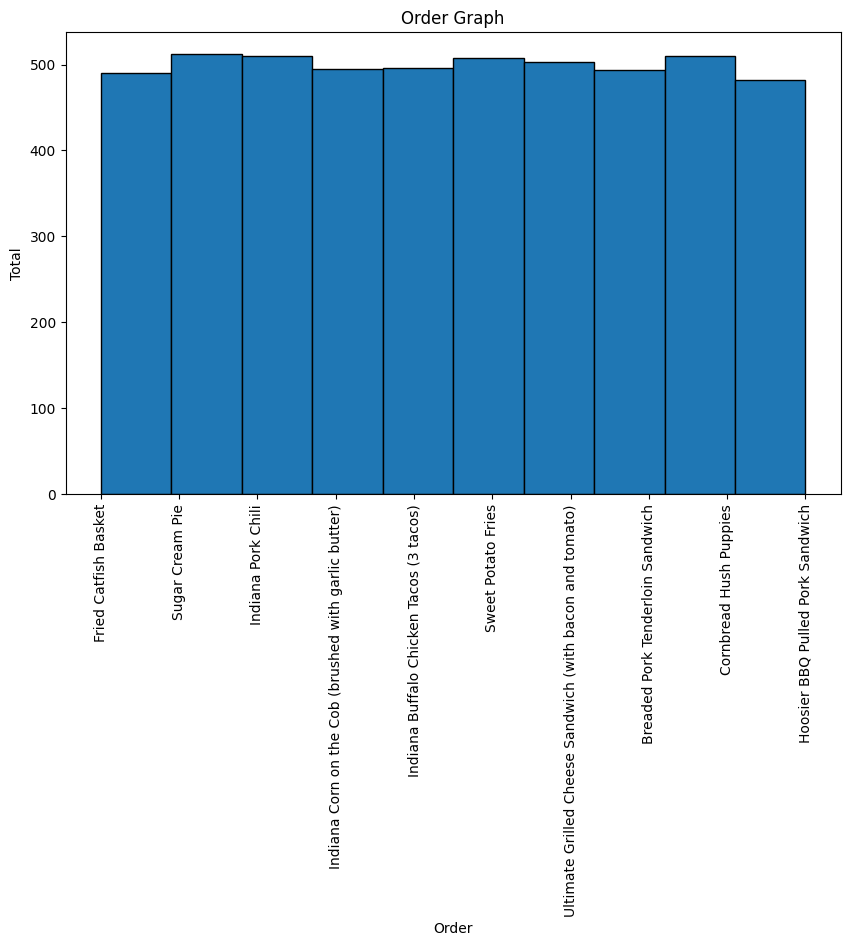

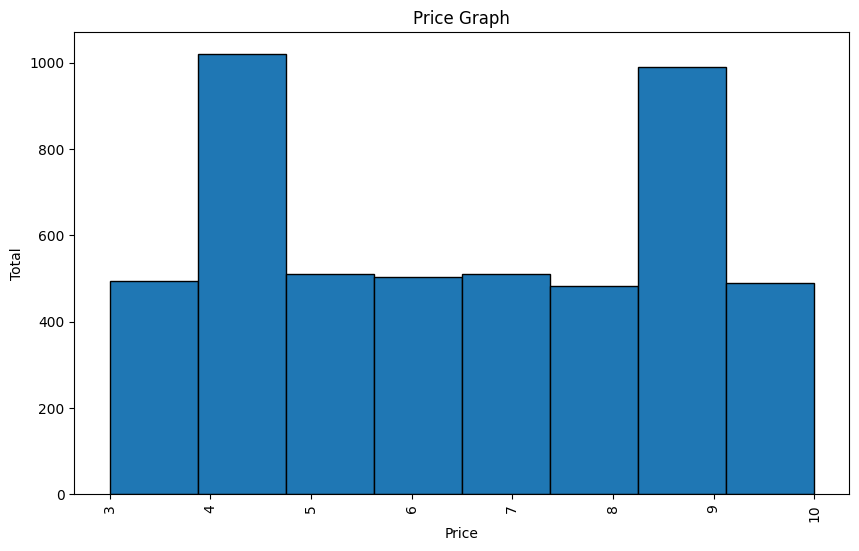

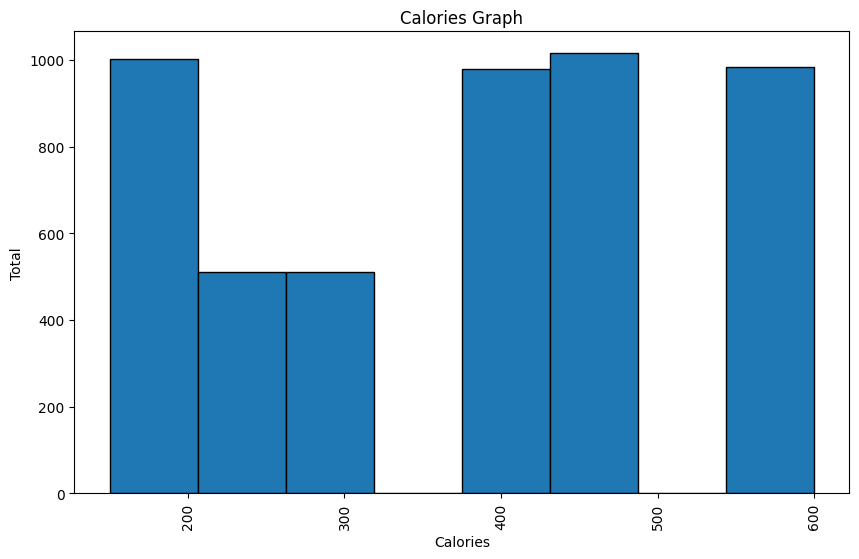

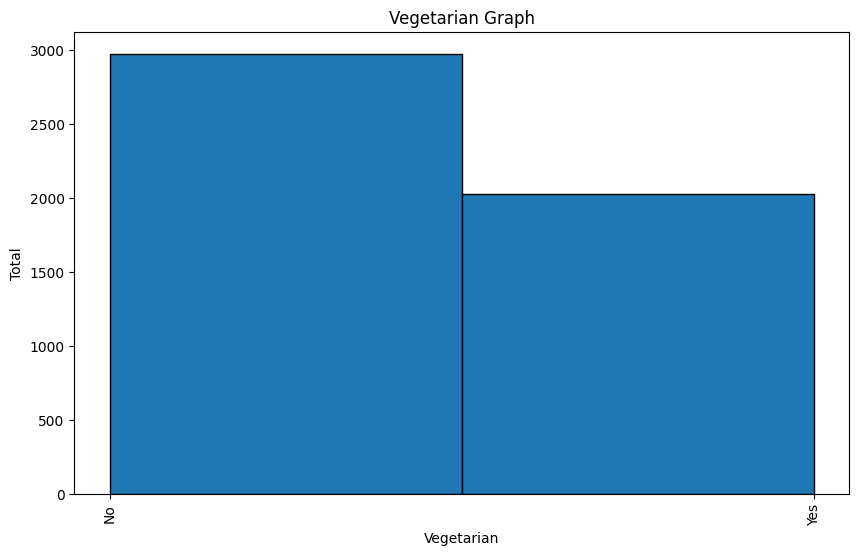

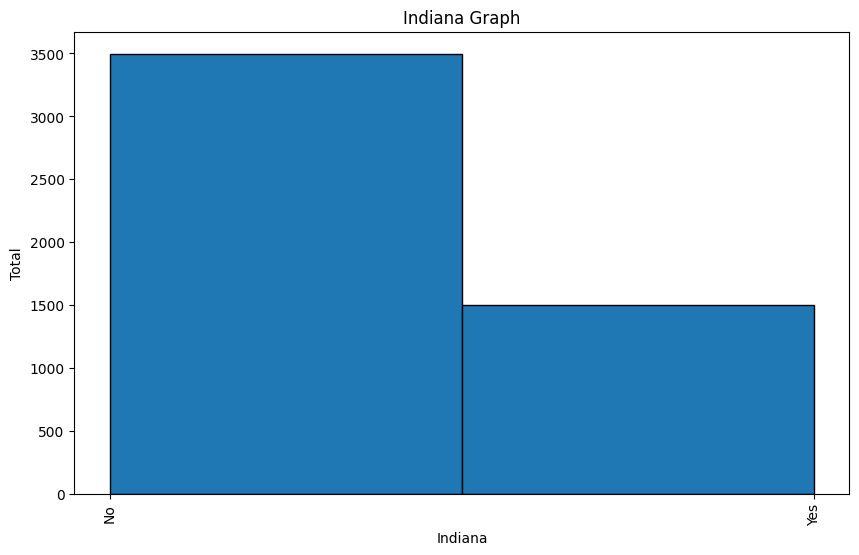

In [9]:
# using function defined above
visualize(menu)

## Distribution/Biases Interpretation
There is not much to say here, but analyzing the menu may help interpret the meaning behind predictions and business strategies for FoodX.

**Price**
* The prices are pretty evenly distributed, with items slightly biased on 4 and 9 dollars.
* Insights are trivial but could be useful if the menu size were to expand.

**Calories**
* Overall balanced distribution, but slightly higher bias towards more caloric-rich foods.
* Makes sense as people would generally order more food that fills them up.
* However, a high amount of orders for low-calorie foods( Sweet Potato Fries and Corn on the Cob), may indicate a strong vegetarian/plant-based interest.

**Vegetarian**
* Unbalanced distribution between non-veg and veg (~1000 orders).
* This may highlight bias towards non-vegetarian audiences, possibly discriminating against the plant-based student segment.

**Indiana**
* Very uneven distribution between local (Indiana) and non-local foods (almost double!).
* Bias for non-local foods, which may be the norm in most cases. However considering FoodX's values of staying local in the state of Indiana, this could be insightful.


## Business Use Cases
* Although a very insignificant case now (due to the menu being only 8 items), if FoodX needs to increase revenue or make prices more affordable, they can look to their current trends to see what options are available.

* If FoodX is looking to expand its potential customer base, it could push for more vegetarian items and track how orders are changing relative to their current state. This may help them increase sales and be more confident in their marketing decisions.

* Addressing the idea of local vs. non-local food in Indiana, FoodX could include a wide variety of Indiana foods on their menu so all of their diverse customers can experience their values.


# Part 2: Implications

**Data Collection**
* Does FoodX have explicit consent to obtain this data about students? Or even deeper, do they consent to an ML model being made from their data? This would be a major violation of privacy if not, and would also tarnish the trust relationship between customers.
* From a business analytics standpoint, these data are essential for analyzing the performance of the company over a given time. Trends like these are important for a business to understand who their ideal customer base is, and how to tailor their products specifically to them.
* Even after privacy requirements for ML models are met, technical improvements will need to be made to safeguard against model inversion (extracting data about users from trained models), which is a violation of personal data. Additionally, surveys and other feedback forms should be programmed on the mobile app to keep users in the loop.

**Data Storage**
* How long will the data be stored? If the data is only needed to train the ML model, how can appropriate measures be taken place to delete this data, thereby respecting the privacy of customers? Maybe if there is a continual cycle of data inflow, it can be deleted after 60 days. The student should also be aware of clearly stated text in the privacy policy.
* FoodX may find data like this extremely useful, as they can use it to extract trends from their customer base and make better-informed marketing decisions. Also, they can use long-term data to reflect on their growth over time -- but this idea may contrast with ethical perspectives on customer privacy. Maybe one thing that FoodX could do to combat this is to keep the customer aware of what data they collect, creating more trust and allowing for a long-term relationship.
* When building a machine learning model, it is usually better for the model to have more data since it more easily creates generalizations about the data. However, different use cases may impact this idea. If a simple model is being trained (maybe Logistic Regression), and the data will not be used again, then the data only has to be stored for as long as needed, which would protect user privacy. If a more complex model needs to be used, where it can continually learn or is based on time series, data cannot be deleted directly after training, and the user's data are unprotected. Additionally, storing a lot of data may use up a lot of GPU/Cloud computing resources, which may cost FoodX money.

**Data Biases**:
* Biases in the data will inherently lead to consequences for how customers may view their experience. Maybe a recommendation algorithm that discriminates against a student's university may make them feel excluded and resentful of the app. Additionally, students who are in a popular demographic may be targeted excessively by surveys, events, or emails, which could be an infringement of their privacy.

* FoodX could offer specialized deals/coupons to those who are most likely to buy from them based on data. However, if these data are biased, students who are not in a certain demographic will not have access to these offers, and end up paying more. Moreover, if FoodX focuses too much on one target audience, they may lose out on potential customers by polarizing them, due to biases in the data.
* When training a machine learning model, if there is an uneven distribution in the dataset, this will most likely be reflected in the model. This is a crucial component from a technical standpoint since the quality of the data will directly impact how well a model may perform. This emphasizes data preprocessing and collecting a balanced dataset. For data scientists, this means creativity in organizing the data to be representative while maintaining a large enough sample size. For app developers, this could mean making surveys/questionnaires that are unbiased and can be used for all student segments.


# Part 3: Building Model

## Model Selection


There are many models to choose from, but given the time constraint and the objective at hand, the following 3 seem like good candidates.

1. Logistic Regression
2. Random Forest or Decision Trees
3. K nearest neighbors

*Could train a neural network (GNN possibly), but very complex and not as straightforward. If time-series data got into play, something like RNNs, LSTMs, or Transformers could make sense.*

**Logistic Regression**
Since all of the data is in numerical and categorical format, all of the features could serve as input to a model. Additionally, most of the trends follow a predictable format -- students with X mean more orders (Y).

**Decision Trees**
Decision trees could prove useful in this case and there are many rules we could provide. However, this may become tedious and impossible if we expand the dataset. Random forest could work, but probably not as accurately as other simple models like logistic regression.

**K Nearest Neighbors (KNN)**
This could provide an intuitive approach to picking up on different features (clusters) important to our dataset. But, looking at our dataset, we can easily pick out trends so this model may become redundant.

Out of all of these models, the obvious choice seems to be **Logistic Regression** as it is the most simple, intuitive, and accurate approach. KNNs may be a good candidate in the future.


## Traning and Testing

Since I am going to use a logistic regression model, and we have a relatively large amount of data, I will split **training and testing data by 80% and 20%** respectively. Will show the code to split into cells below.

## Data Preperation


To make a trainable dataset, we will need to clean up some of the columns. Here is an outline of the changes:

* Try adding some feature-engineered columns! Scale these down before adding to the dataset
* Use one-hot encoding for categorical data like Major and university
* Convert ordinal values like Year and Time into machine-readable order-based encodings



### Data Preperation Function

In [10]:
def transform_df(df):
  # feature engineering

  # orders v. time since noon
  time_since_noon = [abs(12-time) for time in list(df['Time'])]
  df["Time_Since_Noon"] = time_since_noon

  # distance to indianopolis
  universites_unique = list(df['University'].unique())
  dis_to_indy = [70.1, 49.7, 5, 0.1, 142, 169, 150, 66, 55, 44] # thanks chatGPT bing!

  universities = [dis_to_indy[universites_unique.index(univeristy)] for univeristy in list(df['University'])]
  df["Dis_To_Indy"] = universities

  #... Want to explore more features, but would requrie more time
  # Ex: median pay of major
  # Ex: average calories eaten per meal for year 1, 2, 3 and 4 students

  # scaling new features and adding to df
  standard_scaler = StandardScaler()
  numerical_features = ["Time_Since_Noon", "Dis_To_Indy"]
  df[numerical_features] = standard_scaler.fit_transform(df[numerical_features])

  # using one-hot encoding on categorical features
  df = pd.get_dummies(df, columns=['Major', 'University'], drop_first=True)

  # using ordinal transformation for year and time
  ordinal_encoder = OrdinalEncoder()
  ordinal_featues = ["Year", "Time"]
  df[ordinal_featues] = ordinal_encoder.fit_transform(df[ordinal_featues])



  return df

### Transforming Data

In [11]:
# transforming dataframe
df = transform_df(df)
df.head()

,Year,Time,Order,Time_Since_Noon,Dis_To_Indy,Major_Anthropology,Major_Astronomy,Major_Biology,Major_Business Administration,Major_Chemistry,...,Major_Sociology,University_Butler University,University_DePauw University,University_Indiana State University,University_Indiana University Bloomington,University_Indiana University-Purdue University Indianapolis (IUPUI),University_Purdue University,University_University of Evansville,University_University of Notre Dame,University_Valparaiso University
0,1.0,4.0,Fried Catfish Basket,-1.228585,0.734221,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2.0,6.0,Sugar Cream Pie,0.947057,0.234756,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2.0,4.0,Indiana Pork Chili,-1.228585,-0.859661,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,1.0,3.0,Fried Catfish Basket,-0.140764,0.734221,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,4.0,Indiana Corn on the Cob (brushed with garlic b...,-1.228585,-0.859661,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


### Splitting Dataset

In [12]:
# extracting features and output
X, y = df.drop(['Order'], axis=1), df['Order']

# splitting data into training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Checking Data

In [13]:
print(f"Columns: {len(X_train.columns)}")
X_train.head() # checking out new training data

Columns: 32


,Year,Time,Time_Since_Noon,Dis_To_Indy,Major_Anthropology,Major_Astronomy,Major_Biology,Major_Business Administration,Major_Chemistry,Major_Civil Engineering,...,Major_Sociology,University_Butler University,University_DePauw University,University_Indiana State University,University_Indiana University Bloomington,University_Indiana University-Purdue University Indianapolis (IUPUI),University_Purdue University,University_University of Evansville,University_University of Notre Dame,University_Valparaiso University
4227,1.0,4.0,-1.228585,-0.979631,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4676,2.0,2.0,0.947057,-0.859661,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
800,2.0,4.0,-1.228585,0.234756,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3671,2.0,3.0,-0.140764,-0.979631,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4193,2.0,6.0,0.947057,3.155649,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Training Function

In [14]:
# training/pickling function
def train(X_train, y_train):
  # creating the model
  logreg = LogisticRegression(max_iter=2000)

  # training the model
  logreg.fit(X_train, y_train)

  # saving model
  with open('model.pkl', 'wb') as file:
    pickle.dump(logreg, file)


## Training/Testing Model

In [15]:
# training model
train(X_train, y_train)

In [16]:
# making predictions
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)
y_pred = model.predict(X_test)

In [17]:
# evaluating model overall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(classification_report(y_test, y_pred))

# side note
# I am unfamilar with how to test whether features actaully matter in model predicions, but would like to explore this!

Accuracy: 0.595
Precision: 0.5964275305186902
                                                          precision    recall  f1-score   support

                        Breaded Pork Tenderloin Sandwich       0.55      0.45      0.49        94
                                  Cornbread Hush Puppies       0.57      0.56      0.57       112
                                    Fried Catfish Basket       0.67      0.52      0.59       107
                        Hoosier BBQ Pulled Pork Sandwich       0.55      0.53      0.54       103
                 Indiana Buffalo Chicken Tacos (3 tacos)       0.55      0.58      0.56        93
    Indiana Corn on the Cob (brushed with garlic butter)       0.60      0.81      0.69        84
                                      Indiana Pork Chili       0.60      0.82      0.69        95
                                         Sugar Cream Pie       0.62      0.67      0.65       110
                                      Sweet Potato Fries       0.58    

Some pretty graphs!

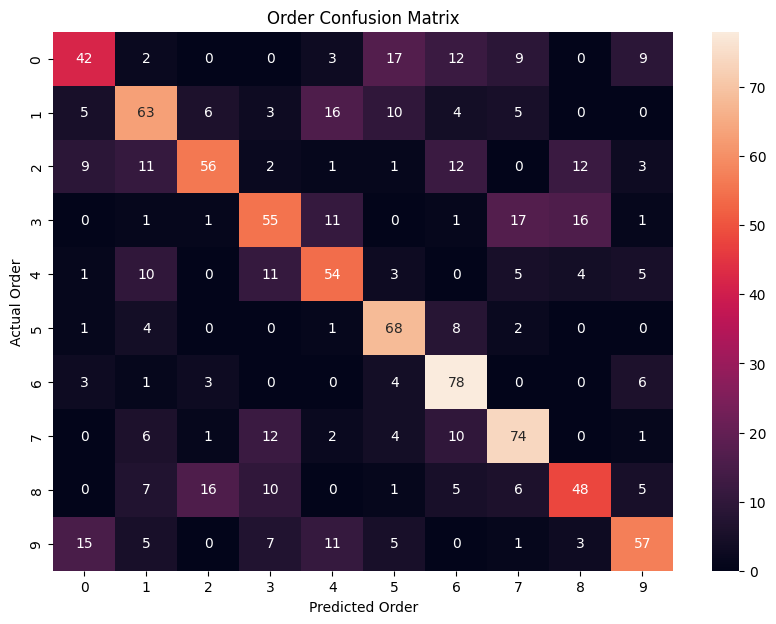

In [18]:
# confusion matrix
confusion_matrix_text = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix_text, annot=True, fmt="d")
plt.title('Order Confusion Matrix')
plt.ylabel('Actual Order')
plt.xlabel('Predicted Order')
plt.show()

Not too bad! A simple approach and no feature engineering, the model performs at **59% accuracy**.

# Part 4: Next Steps

Looking at the accuracy of the model made from a very simple implementation, there is much room for improvement.

Given that the cooks originally had a 1 in 10 chance of guessing the correct order, a 6 out of 10 chance is a big improvement! I think this is something that can be deployed immediately since it outperforms the current system. However, several factors come into play before releasing this model to the public.

**Cost**
Logistic regression is computationally cheaper compared to other bigger models, meaning that it can be used effectively on a student's phone. This means that students will be more satisfied with the speed of the algorithm. However, due to its relatively low accuracy (60%), the student may still feel that the algorithm is not personalized, incurring customer satisfaction costs. Additionally, if FoodX decided to scale with this model, the 10% discount from misclassification would start to add up to a large amount.

**Feature Engineering**
Many more features could have been extracted from the existing ones, which could prove useful to the model and other aspects of business analysis. For example, if we created a new feature for the average amount of calories eaten per meal for college students, the model could predict what food the customer would order at a higher accuracy.

**Handling Bias**
There was a lot of bias in the data, in terms of representation, an issue that must be addressed. This big gap in data could be the primary reason for lower accuracy since the model cannot accurately predict from some features (e.g. freshman or seniors). To handle missing data, techniques like imputation could be used to fill in, but not to a large extent (because so much is missing!).

**Other ML Models**
If the areas above are addressed and there is still a ceiling of performance, an important consideration would be the use of more sophisticated models like Neural Networks (RNNs/GNNs?) or LSTMs (if we can track multiple orders by the same student). Although it would require more time and resources, it may be beneficial to improve the depth/accuracy of the model. If a promotion like the following is not at the top of the agenda, a simpler model might make more sense.
